In [1]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, Binarizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix, auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC, LinearSVC
from sklearn.feature_selection import SelectPercentile
import xgboost
import eli5


%matplotlib inline

In [2]:
import pandas as pd

# Define the path to your Excel file
file_path = r"C:\Users\Shrav\Downloads\cardiotocography (1)\CTG.xls"

# Read the "Raw Data" sheet from the Excel file
df = pd.read_excel(file_path, sheet_name='Raw Data')

# Display the first few rows of the dataframe
print(df.head())


       FileName       Date      SegFile       b        e     LBE      LB  \
0           NaN        NaT          NaN     NaN      NaN     NaN     NaN   
1  Variab10.txt 1996-12-01  CTG0001.txt 240.000  357.000 120.000 120.000   
2    Fmcs_1.txt 1996-05-03  CTG0002.txt   5.000  632.000 132.000 132.000   
3    Fmcs_1.txt 1996-05-03  CTG0003.txt 177.000  779.000 133.000 133.000   
4    Fmcs_1.txt 1996-05-03  CTG0004.txt 411.000 1192.000 134.000 134.000   

     AC    FM    UC  ...     C     D     E    AD    DE    LD    FS  SUSP  \
0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
1 0.000 0.000 0.000  ... 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000   
2 4.000 0.000 4.000  ... 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   
3 2.000 0.000 5.000  ... 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   
4 2.000 0.000 6.000  ... 0.000 0.000 0.000 1.000 0.000 0.000 0.000 0.000   

   CLASS   NSP  
0    NaN   NaN  
1  9.000 2.000  
2  6.000 1.000  
3  6.000 1.000  
4

In [3]:

print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [4]:


# Drop duplicates
df.drop_duplicates(inplace=True)

# Drop rows with any null values
df.dropna(inplace=True)

# Reset the index after dropping
df.reset_index(drop=True, inplace=True)

# Check the shape of the cleaned DataFrame
print("Cleaned DataFrame shape:", df.shape)


Cleaned DataFrame shape: (2126, 40)


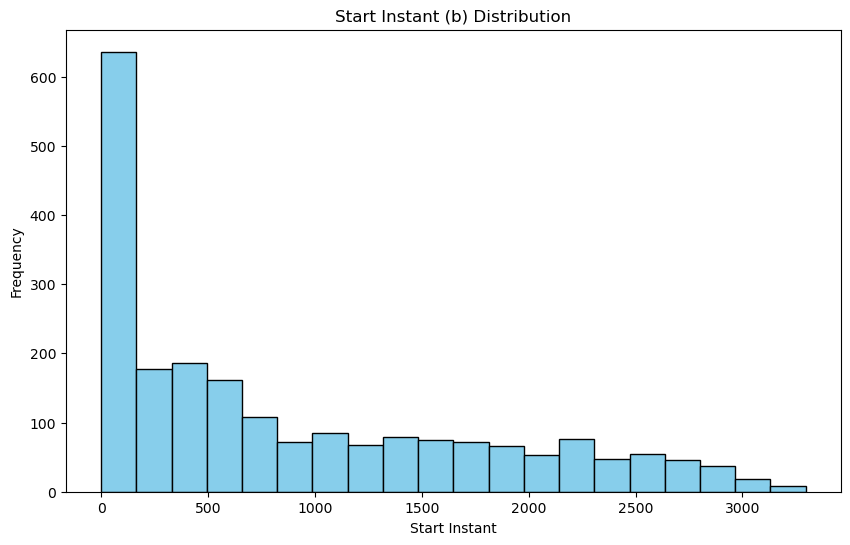

In [5]:
plt.figure(figsize=(10, 6))
df['b'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Start Instant (b) Distribution')
plt.xlabel('Start Instant')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


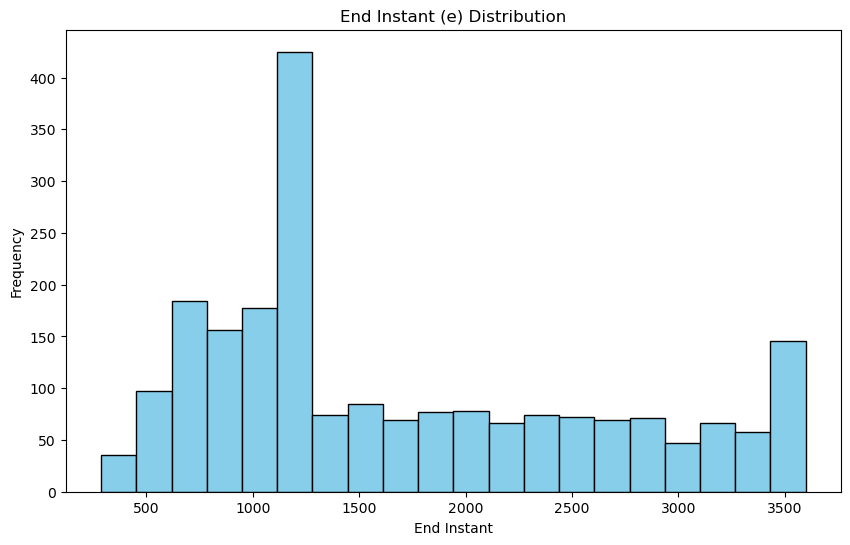

In [6]:
plt.figure(figsize=(10, 6))
df['e'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('End Instant (e) Distribution')
plt.xlabel('End Instant')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


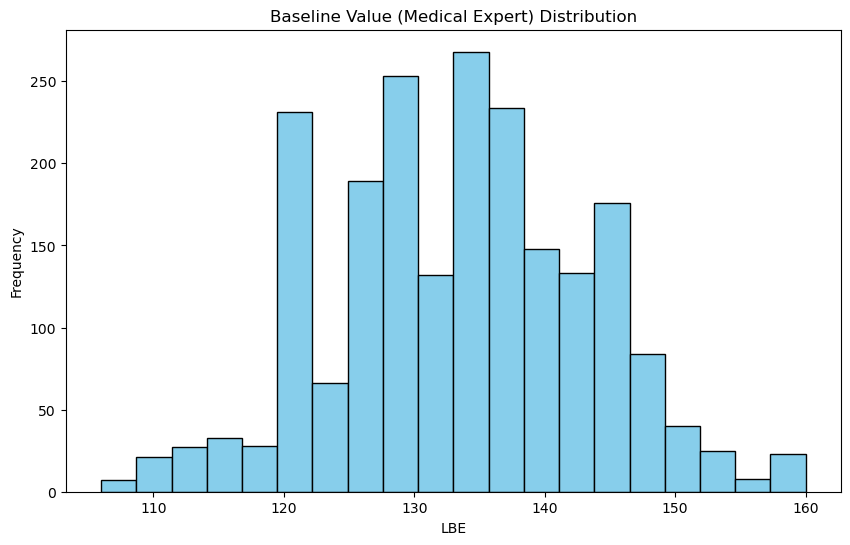

In [7]:
plt.figure(figsize=(10, 6))
df['LBE'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Baseline Value (Medical Expert) Distribution')
plt.xlabel('LBE')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


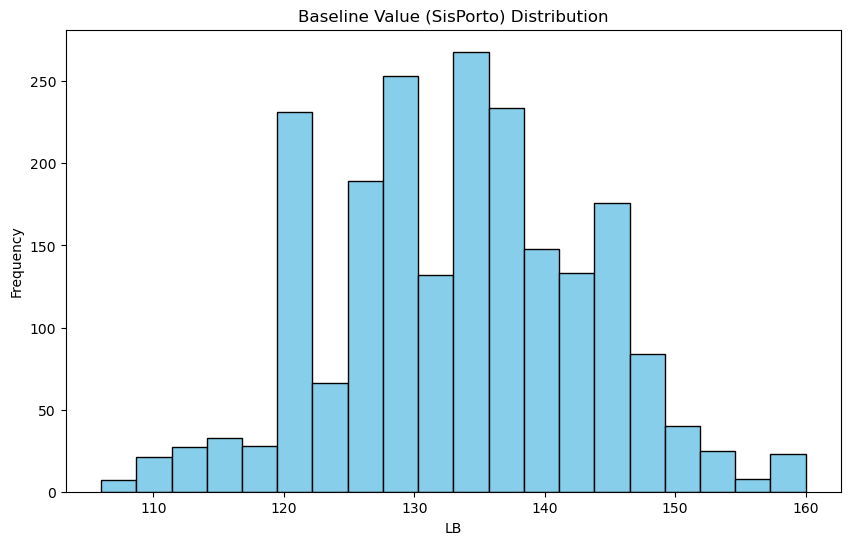

In [8]:
plt.figure(figsize=(10, 6))
df['LB'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Baseline Value (SisPorto) Distribution')
plt.xlabel('LB')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


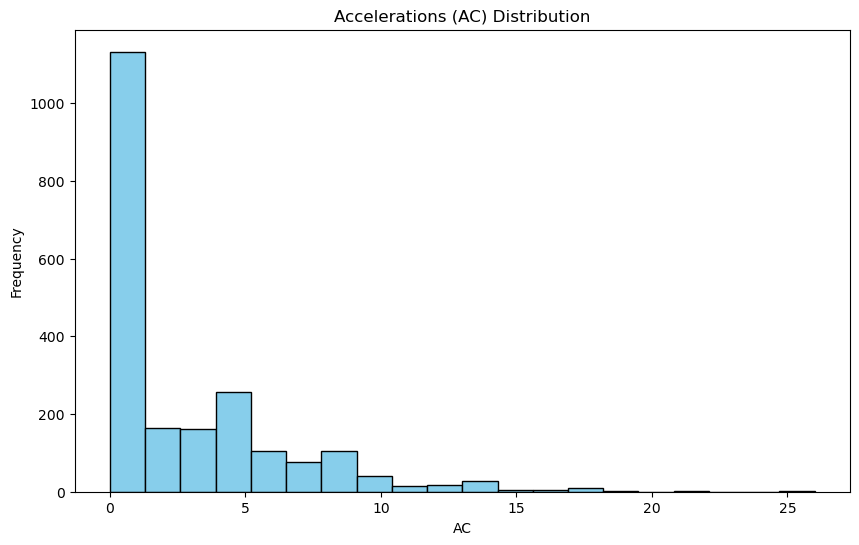

In [9]:
plt.figure(figsize=(10, 6))
df['AC'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Accelerations (AC) Distribution')
plt.xlabel('AC')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


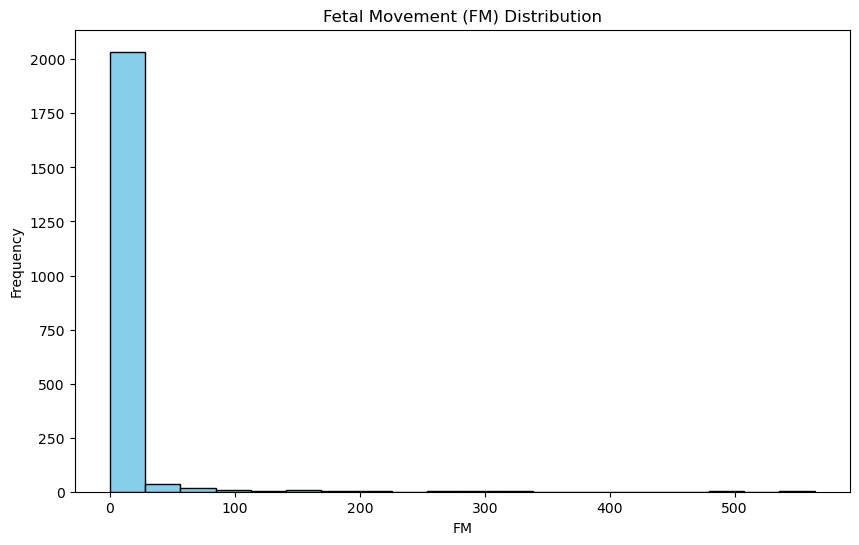

In [10]:
plt.figure(figsize=(10, 6))
df['FM'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Fetal Movement (FM) Distribution')
plt.xlabel('FM')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


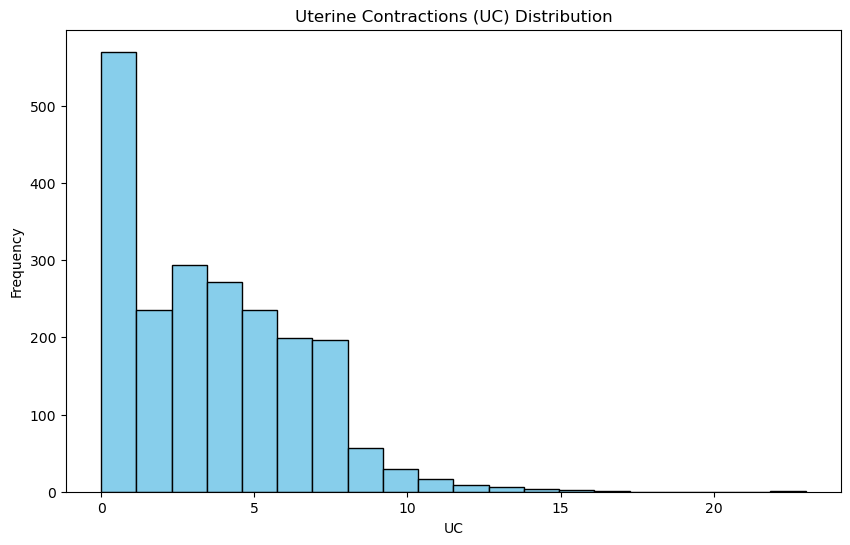

In [11]:
plt.figure(figsize=(10, 6))
df['UC'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Uterine Contractions (UC) Distribution')
plt.xlabel('UC')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


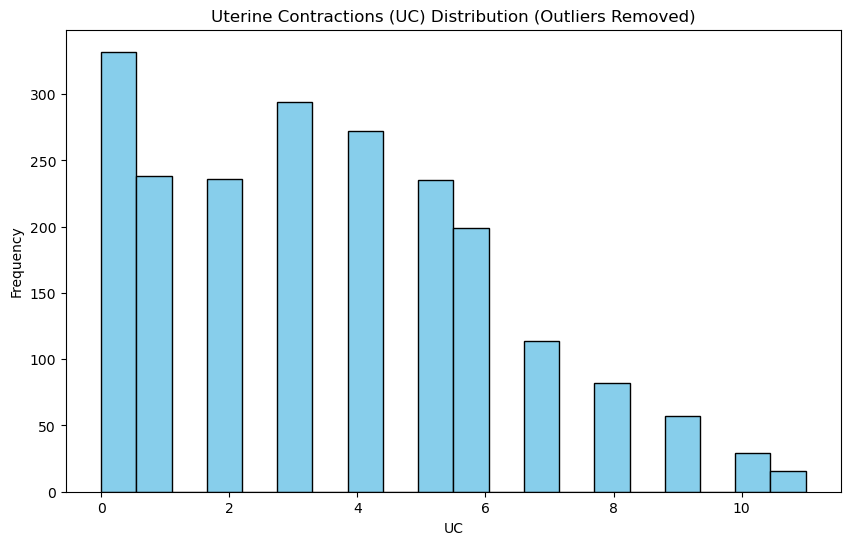

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Define a function to remove outliers using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from 'UC' column
df_cleaned = remove_outliers_iqr(df, 'UC')

# Plot the histogram of Uterine Contractions (UC) distribution after removing outliers
plt.figure(figsize=(10, 6))
df_cleaned['UC'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Uterine Contractions (UC) Distribution (Outliers Removed)')
plt.xlabel('UC')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


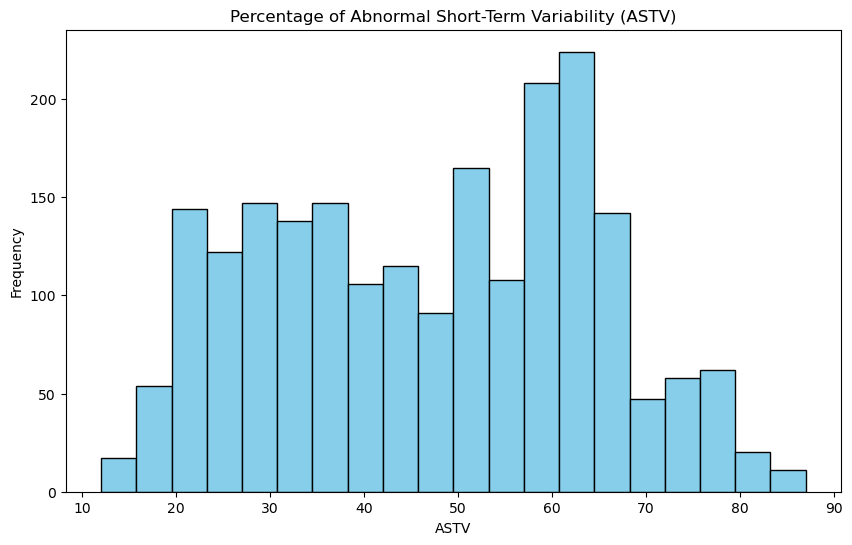

In [13]:
plt.figure(figsize=(10, 6))
df['ASTV'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Percentage of Abnormal Short-Term Variability (ASTV)')
plt.xlabel('ASTV')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


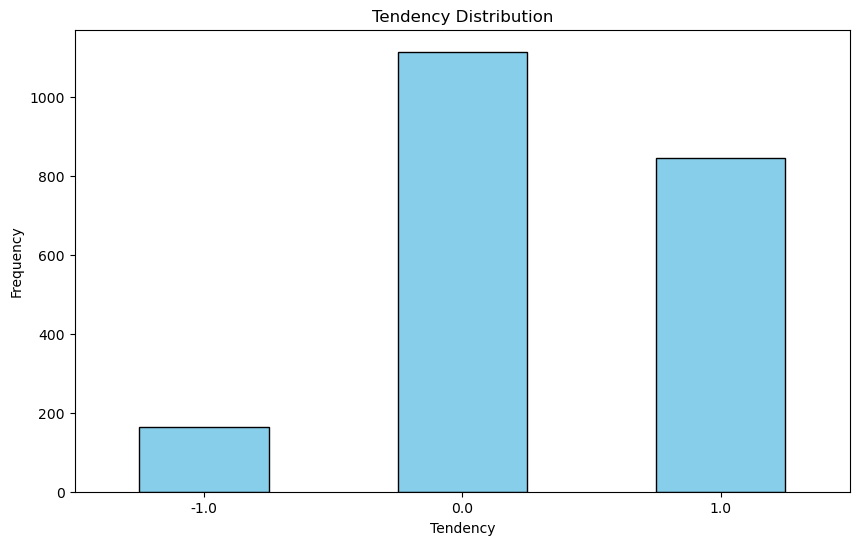

In [14]:
plt.figure(figsize=(10, 6))
df['Tendency'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Tendency Distribution')
plt.xlabel('Tendency')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


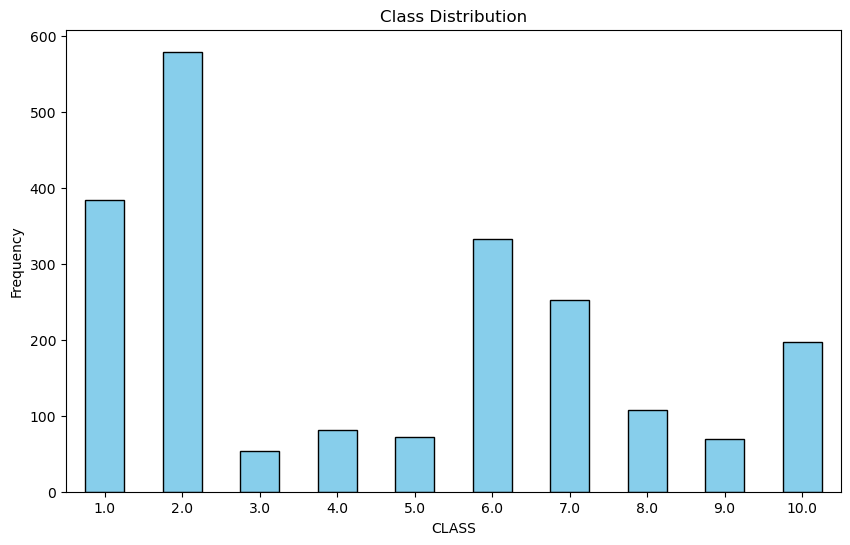

In [15]:
plt.figure(figsize=(10, 6))
df['CLASS'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Class Distribution')
plt.xlabel('CLASS')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


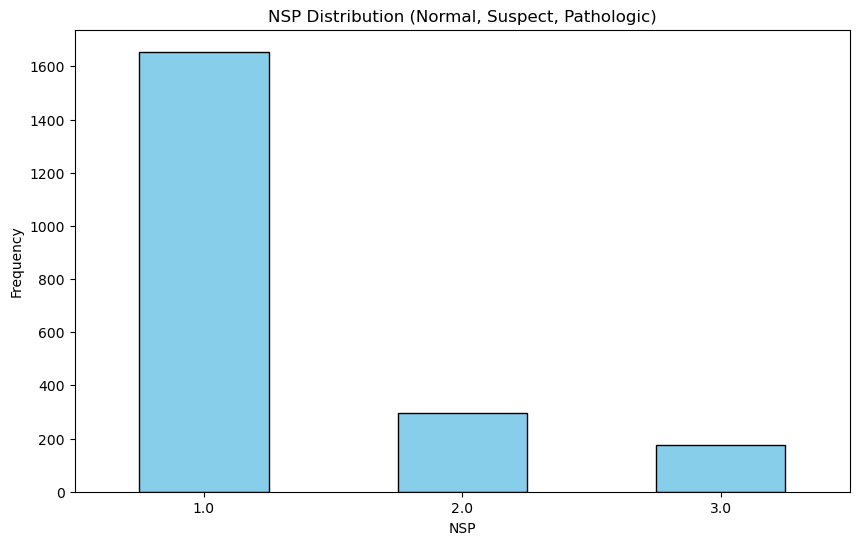

In [16]:
plt.figure(figsize=(10, 6))
df['NSP'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('NSP Distribution (Normal, Suspect, Pathologic)')
plt.xlabel('NSP')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


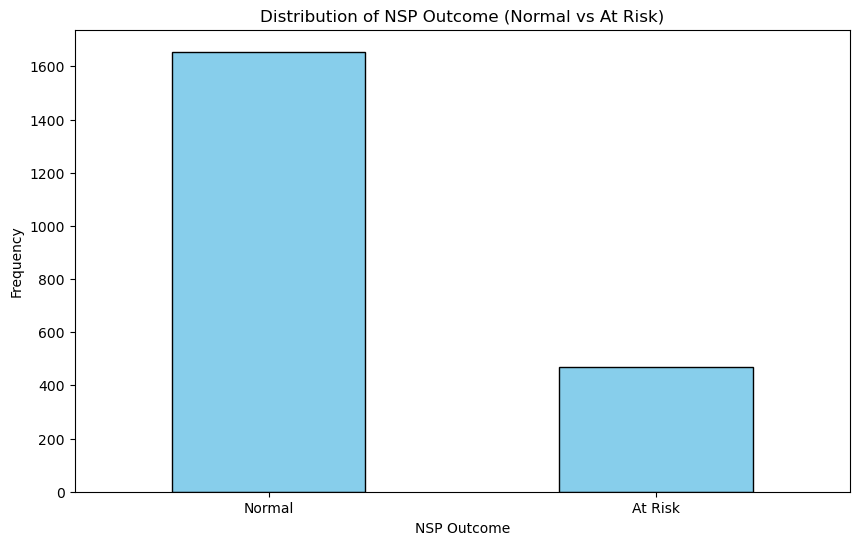

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create a new column based on NSP values
df.loc[df['NSP'] == 1, 'nsp_outcome'] = 'Normal'
df.loc[df['NSP'].isin([2, 3]), 'nsp_outcome'] = 'At Risk'

# Step 2: Plotting the distribution of 'nsp_outcome'
plt.figure(figsize=(10, 6))
sns.set_palette(palette='viridis')

# Bar plot to visualize the distribution of 'nsp_outcome'
df['nsp_outcome'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of NSP Outcome (Normal vs At Risk)')
plt.xlabel('NSP Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


In [18]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP,nsp_outcome
0,Variab10.txt,1996-12-01,CTG0001.txt,240.000,357.000,120.000,120.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,9.000,2.000,At Risk
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.000,632.000,132.000,132.000,4.000,0.000,4.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,6.000,1.000,Normal
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.000,779.000,133.000,133.000,2.000,0.000,5.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,6.000,1.000,Normal
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.000,1192.000,134.000,134.000,2.000,0.000,6.000,...,0.000,0.000,1.000,0.000,0.000,0.000,0.000,6.000,1.000,Normal
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.000,1147.000,132.000,132.000,4.000,0.000,5.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,1.000,Normal


In [19]:
# Encode the 'nsp_outcome' column in place: Normal=0, At Risk=1
df['nsp_outcome'] = df['nsp_outcome'].map({'Normal': 0, 'At Risk': 1})

# Display the first few rows to verify the encoding
print(df[['nsp_outcome']].head())


   nsp_outcome
0            1
1            0
2            0
3            0
4            0


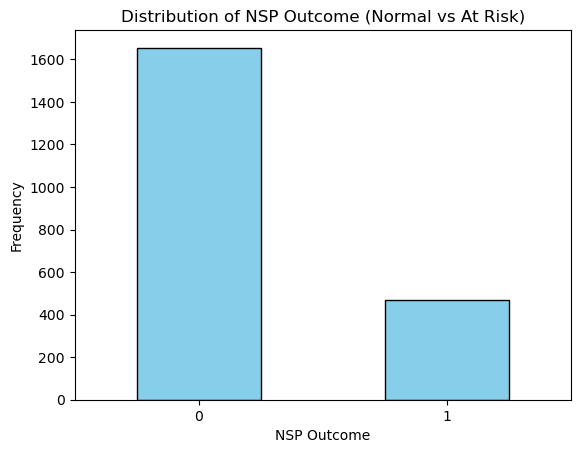

In [20]:
#Bar plot to visualize the distribution of 'nsp_outcome'
df['nsp_outcome'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of NSP Outcome (Normal vs At Risk)')
plt.xlabel('NSP Outcome')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.grid(False)
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns that need label encoding
categorical_columns = ['Tendency', 'A', 'B', 'C', 'D', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']

# Initialize the label encoder
label_encoder = LabelEncoder()


In [26]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Define Sparsemax activation
class Sparsemax(nn.Module):
    def __init__(self):
        super(Sparsemax, self).__init__()

    def forward(self, z):
        z_sorted, _ = torch.sort(z, descending=True)
        z_cumsum = torch.cumsum(z_sorted, dim=-1)
        k = torch.arange(1, z.shape[-1] + 1, dtype=z.dtype, device=z.device).view(1, -1)
        threshold = (z_cumsum - 1) / k
        k = (z_sorted > threshold).sum(dim=-1, keepdim=True)
        return F.relu(z - threshold.gather(1, k - 1))

# Define a simplified model with Sparsemax and Batch Normalization
class SimpleTabNet(nn.Module):
    def __init__(self, input_dim):
        super(SimpleTabNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 32)  # First linear layer with reduced units
        self.batch_norm1 = nn.BatchNorm1d(32)  # Batch normalization layer
        self.sparsemax = Sparsemax()  # Sparsemax activation
        self.fc2 = nn.Linear(32, 2)  # Output layer for two classes

    def forward(self, x):
        x = self.fc1(x)  # Apply first linear layer
        x = self.batch_norm1(x)  # Apply Batch Normalization
        x = self.sparsemax(x)  # Apply Sparsemax activation
        return self.fc2(x)  # Output logits

# Your existing data preparation code
y = df['nsp_outcome'].values 
X = df.drop(columns=['nsp_outcome', 'FileName', 'Date', 'SegFile']).values  # Drop unnecessary columns

# Preprocess data (scaling)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Convert data to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_resampled)
y_train_tensor = torch.LongTensor(y_train_resampled)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = SimpleTabNet(input_dim)
criterion = nn.CrossEntropyLoss(weight=torch.tensor([1.0, 3.0]))  # Adjusting for class imbalance
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop with validation and early stopping
epochs = 50  # Set a reasonable number of epochs
patience = 5  # Number of epochs to wait before stopping if no improvement
best_val_loss = float('inf')
counter = 0

# Split the training data for validation
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

# Convert validation data to PyTorch tensors
X_val_tensor = torch.FloatTensor(X_val)
y_val_tensor = torch.LongTensor(y_val)

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    
    # Forward pass
    output = model(X_train_tensor)
    
    # Compute loss
    loss = criterion(output, y_train_tensor)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    # Validation phase
    model.eval()
    with torch.no_grad():
        val_output = model(X_val_tensor)
        val_loss = criterion(val_output, y_val_tensor)

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        counter = 0  # Reset counter
        torch.save(model.state_dict(), 'best_model.pth')  # Save the best model
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping triggered.")
            break

# Load the best model for evaluation
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    _, predicted = torch.max(y_pred.data, 1)

# Print classification report
print(classification_report(y_test_tensor.numpy(), predicted.numpy()))


Epoch [10/50], Loss: 0.5641, Validation Loss: 0.5543
Epoch [20/50], Loss: 0.4867, Validation Loss: 0.4803
Epoch [30/50], Loss: 0.4292, Validation Loss: 0.4220
Epoch [40/50], Loss: 0.3811, Validation Loss: 0.3738
Epoch [50/50], Loss: 0.3411, Validation Loss: 0.3342
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       333
           1       0.91      0.98      0.94        93

    accuracy                           0.97       426
   macro avg       0.95      0.98      0.96       426
weighted avg       0.98      0.97      0.97       426

